In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
os.getcwd()

'C:\\Users\\tejaramk\\Downloads\\Amex'

In [3]:
#os.chdir('C:/Users/30030388/Downloads/Amex/')

In [4]:
campaign_data = pd.read_csv('campaign_data.csv')

In [5]:
campaign_data.head(3)

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13


In [6]:
campaign_data.start_date = pd.to_datetime(campaign_data.start_date, format = '%d/%m/%y')
campaign_data.end_date = pd.to_datetime(campaign_data.end_date, format = '%d/%m/%y')
campaign_data['campaign_duration'] = (campaign_data.end_date - campaign_data.start_date).dt.days

In [7]:
campaign_data.shape

(28, 5)

In [8]:
campaign_data.sort_values(['start_date'], inplace = True)

In [9]:
campaign_data.describe()

,campaign_id,campaign_duration
count,28.000000,28.000000
mean,15.571429,41.857143
std,9.118271,11.958924
min,1.000000,32.000000
25%,7.750000,32.000000
50%,16.500000,35.500000
75%,23.250000,49.250000
max,30.000000,70.000000


In [10]:
campaign_data["season"]=campaign_data["start_date"].apply(lambda dt: (dt.month%12 + 3)//3)

In [11]:
def CreateDateSeq(df,start_date_column_name,end_date_column_name):
    new_df=pd.DataFrame()
    for i in range(len(df)):
        p=pd.DataFrame()
        p["Date"]=pd.date_range(df.loc[i,start_date_column_name],df.loc[i,end_date_column_name])
        x=list(df.columns)
        #x=x.remove(start_date_column_name)
        #x=x.remove(end_date_column_name)
        for j in range(len(x)):
            p[x[j]]=df.loc[i,x[j]]
        new_df=pd.concat([new_df,p],axis=0)
    return new_df

In [12]:
Campaign_Data_Seq=CreateDateSeq(campaign_data,"start_date","end_date")

In [13]:
Campaign_Data_Seq.head(3)

,Date,campaign_id,campaign_type,start_date,end_date,campaign_duration,season
0,2013-10-21,24,Y,2013-10-21,2013-12-20,60,4
1,2013-10-22,24,Y,2013-10-21,2013-12-20,60,4
2,2013-10-23,24,Y,2013-10-21,2013-12-20,60,4


In [14]:
item_data = pd.read_csv('item_data.csv')

In [15]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [16]:
item_data.shape

(74066, 4)

In [17]:
coupon_item = pd.read_csv('coupon_item_mapping.csv')

In [18]:
coupon_item.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [19]:
coupon_item.shape

(92663, 2)

In [20]:
len(list(set(coupon_item['item_id'].unique())-set(item_data['item_id'].unique())))

0

In [21]:
len(list(set(item_data['item_id'].unique())-set(coupon_item['item_id'].unique())))

37777

In [22]:
coupon_item_2 = pd.merge(coupon_item, item_data, left_on=['item_id'], right_on= ['item_id'], how = 'outer')

In [23]:
coupon_item_2=coupon_item_2.fillna("NoData")

In [24]:
coupon_item_2.head(3)

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,6,37,56,Local,Grocery
2,22,37,56,Local,Grocery


In [25]:
coupon_item_2=coupon_item_2[coupon_item_2["coupon_id"]!="NoData"]

In [26]:
coupon_item_3=coupon_item_2.groupby(['coupon_id',"brand_type"]).apply(lambda x: pd.Series({
    'no_items' : (x['item_id']).nunique(),
    'no_brand' : (x['brand']).nunique(),
    'no_category' : (x['category']).nunique(),
})).reset_index()

In [27]:
coupon_item_3_pivot=pd.DataFrame(pd.pivot_table(coupon_item_3,index=["coupon_id"],
                                                columns=["brand_type"],values=["no_items","no_brand","no_category"],
                                                aggfunc='sum',fill_value=0).to_records())

In [28]:
coupon_item_3_pivot.head(3)

,coupon_id,"('no_brand', 'Established')","('no_brand', 'Local')","('no_category', 'Established')","('no_category', 'Local')","('no_items', 'Established')","('no_items', 'Local')"
0,1.0,3,0,2,0,39,0
1,2.0,1,0,1,0,2,0
2,3.0,2,0,1,0,17,0


In [29]:
coupon_item_3_pivot.shape

(1116, 7)

In [187]:
coupon_item_x = pd.merge(coupon_item, item_data, left_on=['item_id'], right_on= ['item_id'], how = 'left')

In [191]:
coupon_item_x_pivot = pd.pivot_table(coupon_item_x[['coupon_id', 'category', 'item_id']], index= ['coupon_id'], columns= ['category'] , aggfunc= ['count']).reset_index()
coupon_item_x_pivot = pd.concat([coupon_item_x_pivot['coupon_id'], coupon_item_x_pivot['count']['item_id']], axis =  1)
coupon_item_x_pivot.fillna(0, inplace = True)

In [30]:
customer_demo  = pd.read_csv('customer_demographics.csv')

In [31]:
customer_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [32]:
customer_demo.isna().sum()

customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64

In [33]:
customer_demo[["marital_status","no_of_children"]].drop_duplicates()

,marital_status,no_of_children
0,Married,NaN
2,NaN,1
3,NaN,2
4,Single,NaN
10,NaN,NaN
16,Single,3+
17,Married,3+
22,Married,2
37,Single,2
54,Single,1


In [34]:
customer_demo=customer_demo.fillna("NoData")

In [35]:
customer_tran = pd.read_csv('customer_transaction_data.csv')

In [36]:
customer_tran.date  = pd.to_datetime(customer_tran.date, format = '%Y-%m-%d').dt.date

In [37]:
(customer_tran.date.max() - customer_tran.date.min()).days

548

In [38]:
customer_tran.shape

(1324566, 7)

In [39]:
customer_tran.head(2)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0


In [40]:
customer_tran.isna().sum()

date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
dtype: int64

In [41]:
customer_tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [42]:
len(list(set(customer_tran['item_id'].unique())-set(item_data['item_id'].unique())))

0

In [43]:
list(set(item_data['item_id'].unique())-set(customer_tran['item_id'].unique()))
#items never purchased

[1192, 42649, 70763]

In [44]:
customer_tran.describe()

,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
count,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06
mean,8.040020e+02,2.951903e+04,1.306633e+02,1.146036e+02,-1.776871e+01,-5.948983e-01
std,4.573363e+02,1.790806e+04,1.311545e+03,1.529053e+02,3.788867e+01,7.069367e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,3.600000e-01,-3.120310e+03,-1.992230e+03
25%,4.180000e+02,1.468400e+04,1.000000e+00,4.916000e+01,-2.315000e+01,0.000000e+00
50%,8.010000e+02,2.659700e+04,1.000000e+00,7.801000e+01,-1.780000e+00,0.000000e+00
75%,1.198000e+03,4.240575e+04,1.000000e+00,1.243100e+02,0.000000e+00,0.000000e+00
max,1.582000e+03,7.406600e+04,8.963800e+04,1.780964e+04,0.000000e+00,0.000000e+00


In [45]:
customer_tran = pd.merge(customer_tran, item_data, left_on= ['item_id'], right_on=['item_id'], how= 'left')

In [46]:
customer_tran['total_price'] = customer_tran.quantity*customer_tran.selling_price

In [47]:
customer_tran.shape

(1324566, 11)

In [48]:
customer_tran = customer_tran.sort_values(['customer_id', 'date'])

In [49]:
customer_tran.head(3)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,total_price
30179,2012-02-21,1,4953,1,142.12,0.00,0.0,1061,Established,Grocery,142.12
30180,2012-02-21,1,5626,1,106.50,0.00,0.0,278,Established,Grocery,106.50
30181,2012-02-21,1,7808,1,99.38,-42.74,0.0,56,Local,Grocery,99.38


In [50]:
#Customer frequency
customer_tran_freq=customer_tran[["customer_id","date"]].drop_duplicates()

In [51]:
shifted = customer_tran_freq.groupby("customer_id").shift(-1)
customer_tran_freq=customer_tran_freq.join(shifted.rename(columns=lambda x: x+"_lag"))

In [52]:
customer_tran_freq=customer_tran_freq.dropna()

In [53]:
customer_tran_freq.head(3)

,customer_id,date,date_lag
30179,1,2012-02-21,2012-03-08
46366,1,2012-03-08,2012-03-29
79938,1,2012-03-29,2012-04-04


In [54]:
customer_tran_freq["diff_days"]=(customer_tran_freq["date_lag"]-customer_tran_freq["date"])/np.timedelta64(1, 'D')

In [55]:
customer_tran_freq_1=pd.DataFrame(pd.DataFrame(customer_tran_freq.groupby("customer_id").agg({"diff_days":['mean','max','min']})
                                              ).to_records())

In [56]:
customer_tran_freq_1.head(3)

,customer_id,"('diff_days', 'mean')","('diff_days', 'max')","('diff_days', 'min')"
0,1,9.000000,25.0,1.0
1,2,12.194444,70.0,1.0
2,3,10.475000,40.0,1.0


In [57]:
customer_tran['date']=pd.to_datetime(customer_tran.date)

In [58]:
Campaign_Data_Seq.head(3)

,Date,campaign_id,campaign_type,start_date,end_date,campaign_duration,season
0,2013-10-21,24,Y,2013-10-21,2013-12-20,60,4
1,2013-10-22,24,Y,2013-10-21,2013-12-20,60,4
2,2013-10-23,24,Y,2013-10-21,2013-12-20,60,4


In [59]:
#Campaingn Details
customer_main_lfd = customer_tran.groupby(['customer_id']).apply(lambda x: pd.Series({
    'no_Shopped_days' : (x['date']).nunique(),
    'no_shopped_items': x['item_id'].nunique(),
    'no_shopped_brands' : x['brand'].nunique(),
    'no_shopped_category' : x['category'].nunique(),
    'total_quantity_shopped': x['quantity'].sum(),
    'total_selling_price': x['selling_price'].sum(),
    'total_shopped_price': x['total_price'].sum(),
    'value_other_discont': x['other_discount'].sum(),
    'value_coupon_discount': x['coupon_discount'].sum()
  
})).reset_index()

In [60]:
customer_tran_campaign=pd.merge(customer_tran,Campaign_Data_Seq,left_on="date",right_on="Date",how="left")

In [61]:
customer_tran_campaign.isna().sum()

date                      0
customer_id               0
item_id                   0
quantity                  0
selling_price             0
other_discount            0
coupon_discount           0
brand                     0
brand_type                0
category                  0
total_price               0
Date                 420209
campaign_id          420209
campaign_type        420209
start_date           420209
end_date             420209
campaign_duration    420209
season               420209
dtype: int64

In [62]:
customer_tran_campaign.shape

(2573793, 18)

In [63]:
customer_tran_campaign=customer_tran_campaign.dropna()

In [64]:
#Campaingn Details
customer_main_campaingn = customer_tran_campaign.groupby(['customer_id',
                                                          "campaign_type"]).apply(lambda x: pd.Series({
    'no_Shopped_days' : (x['date']).nunique(),
    'no_shopped_items': x['item_id'].nunique(),
    'no_shopped_brands' : x['brand'].nunique(),
    'no_shopped_category' : x['category'].nunique(),
    'total_quantity_shopped': x['quantity'].sum(),
    'total_selling_price': x['selling_price'].sum(),
    'total_shopped_price': x['total_price'].sum(),
    'value_other_discont': x['other_discount'].sum(),
    'value_coupon_discount': x['coupon_discount'].sum()
  
})).reset_index()

In [65]:
customer_main_campaingn_affinity=pd.merge(customer_main_campaingn,customer_main_lfd,on='customer_id',how='left')

In [66]:
customer_main_campaingn_affinity.head(3)

,customer_id,campaign_type,no_Shopped_days_x,no_shopped_items_x,no_shopped_brands_x,no_shopped_category_x,total_quantity_shopped_x,total_selling_price_x,total_shopped_price_x,value_other_discont_x,value_coupon_discount_x,no_Shopped_days_y,no_shopped_items_y,no_shopped_brands_y,no_shopped_category_y,total_quantity_shopped_y,total_selling_price_y,total_shopped_price_y,value_other_discont_y,value_coupon_discount_y
0,1,X,22.0,260.0,115.0,8.0,508.0,41546.83,52208.60,-7074.68,-1037.95,56.0,463.0,163.0,9.0,1227.0,98513.93,123948.40,-17030.40,-2116.83
1,1,Y,29.0,298.0,121.0,8.0,1547.0,121640.02,151298.61,-19874.97,-4286.06,56.0,463.0,163.0,9.0,1227.0,98513.93,123948.40,-17030.40,-2116.83
2,2,X,10.0,122.0,67.0,7.0,157.0,14908.72,19137.18,-1599.34,-71.24,37.0,352.0,153.0,9.0,474.0,43100.03,52822.88,-7051.95,-249.34


In [67]:
customer_main_campaingn_affinity['no_Shopped_days_aff']=customer_main_campaingn_affinity['no_Shopped_days_x']/customer_main_campaingn_affinity['no_Shopped_days_y']
customer_main_campaingn_affinity['no_shopped_items_aff']=customer_main_campaingn_affinity['no_shopped_items_x']/customer_main_campaingn_affinity['no_shopped_items_y']
customer_main_campaingn_affinity['no_shopped_brands_aff']=customer_main_campaingn_affinity['no_shopped_brands_x']/customer_main_campaingn_affinity['no_shopped_brands_y']
customer_main_campaingn_affinity['no_shopped_category_aff']=customer_main_campaingn_affinity['no_shopped_category_x']/customer_main_campaingn_affinity['no_shopped_category_y']
customer_main_campaingn_affinity['total_quantity_shopped_aff']=customer_main_campaingn_affinity['total_quantity_shopped_x']/customer_main_campaingn_affinity['total_quantity_shopped_y']
customer_main_campaingn_affinity['total_selling_price_aff']=customer_main_campaingn_affinity['total_selling_price_x']/customer_main_campaingn_affinity['total_selling_price_y']
customer_main_campaingn_affinity['total_shopped_price_aff']=customer_main_campaingn_affinity['total_shopped_price_x']/customer_main_campaingn_affinity['total_shopped_price_y']
customer_main_campaingn_affinity['value_other_discont_aff']=customer_main_campaingn_affinity['value_other_discont_x']/customer_main_campaingn_affinity['value_other_discont_y']
customer_main_campaingn_affinity['value_coupon_discount_aff']=customer_main_campaingn_affinity['value_coupon_discount_x']/customer_main_campaingn_affinity['value_coupon_discount_y']

In [68]:
customer_main_campaingn_affinity=customer_main_campaingn_affinity[['customer_id','campaign_type','no_Shopped_days_aff',
                                                                  'no_shopped_items_aff','no_shopped_brands_aff','no_shopped_category_aff',
                                                                  'total_quantity_shopped_aff','total_selling_price_aff','total_shopped_price_aff',
                                                                  'value_other_discont_aff','value_coupon_discount_aff']]

In [69]:
customer_main_campaingn_affinity.columns

Index(['customer_id', 'campaign_type', 'no_Shopped_days_aff',
       'no_shopped_items_aff', 'no_shopped_brands_aff',
       'no_shopped_category_aff', 'total_quantity_shopped_aff',
       'total_selling_price_aff', 'total_shopped_price_aff',
       'value_other_discont_aff', 'value_coupon_discount_aff'],
      dtype='object')

customer_main_campaingn_pivot=pd.DataFrame(pd.pivot_table(customer_main_campaingn,index=["customer_id","campaign_id",
                                                                                         "season","campaign_type",
                                                                                         "campaign_duration"],
                                                          columns=["brand_type"],values=['no_Shopped_days',
                                                                                                             'no_shopped_items', 'no_shopped_brands', 
                                                                                                             'no_shopped_category','total_quantity_shopped', 
                                                                                                             'total_selling_price', 'total_shopped_price',
                                                                                                             'value_other_discont', 'value_coupon_discount'],
                                                          aggfunc=np.sum,fill_value=0).to_records())

customer_main_campaingn_pivot.head(3)

In [84]:
customer_tran.shape

(1324566, 11)

In [85]:
customer_tran_coupon=pd.merge(customer_tran,coupon_item,on="item_id",how="left")

In [86]:
customer_tran_coupon.shape

(2657495, 12)

In [87]:
customer_tran_coupon.isna().sum()

date                    0
customer_id             0
item_id                 0
quantity                0
selling_price           0
other_discount          0
coupon_discount         0
brand                   0
brand_type              0
category                0
total_price             0
coupon_id          556134
dtype: int64

In [88]:
customer_tran_coupon=customer_tran_coupon.fillna("NoCoupon")

In [89]:
customer_main_coupon = customer_tran_coupon.groupby(['customer_id',"coupon_id","brand_type"]).apply(lambda x: pd.Series({
    'no_Shopped_days' : (x['date']).nunique(),
    'no_shopped_items': x['item_id'].nunique(),
    'no_shopped_brands' : x['brand'].nunique(),
    'no_shopped_category' : x['category'].nunique(),
    'total_quantity_shopped': x['quantity'].sum(),
    'total_selling_price': x['selling_price'].sum(),
    'total_shopped_price': x['total_price'].sum(),
    'value_other_discont': x['other_discount'].sum(),
    'value_coupon_discount': x['coupon_discount'].sum()
  
})).reset_index()

In [90]:
customer_main_coupon_pivot=pd.DataFrame(pd.pivot_table(customer_main_coupon,index=["customer_id","coupon_id"],
                                                          columns=["brand_type"],values=['no_Shopped_days',
                                                                                                     'no_shopped_items', 'no_shopped_brands',
                                                                                                     'no_shopped_category','total_quantity_shopped',
                                                                                                     'total_selling_price', 'total_shopped_price',
                                                                                                     'value_other_discont', 'value_coupon_discount'],
                                                          aggfunc=np.sum,fill_value=0).to_records())

In [91]:
#CustomerCouponSimilarity
coupon_item_2.head(3)

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,6,37,56,Local,Grocery
2,22,37,56,Local,Grocery


In [92]:
coupon_item_list=pd.DataFrame(pd.DataFrame(coupon_item.groupby("coupon_id")["item_id"].apply(list)).to_records())
coupon_brand_list=pd.DataFrame(pd.DataFrame(coupon_item_2[["coupon_id","brand"]].drop_duplicates().groupby("coupon_id")["brand"].apply(list)).to_records())

In [93]:
coupon_item_list.shape

(1116, 2)

In [94]:
customer_item_list=pd.DataFrame(pd.DataFrame(customer_tran[["customer_id","item_id"]].drop_duplicates().groupby("customer_id")["item_id"].apply(list)).to_records())
customer_brand_list=pd.DataFrame(pd.DataFrame(customer_tran[["customer_id","brand"]].drop_duplicates().groupby("customer_id")["brand"].apply(list)).to_records())

In [95]:
customer_item_list.shape

(1582, 2)

In [96]:
customer_brand_list.shape

(1582, 2)

In [97]:
customer_item_list.head(3)

,customer_id,item_id
0,1,"[4953, 5626, 7808, 8107, 8307, 14054, 17047, 1..."
1,2,"[31095, 45231, 45266, 45393, 45502, 7229, 1272..."
2,3,"[10975, 13174, 14978, 16086, 16708, 18156, 195..."


In [98]:
coupon_item_list.head(3)

,coupon_id,item_id
0,1,"[60068, 50199, 17091, 44112, 44868, 51028, 592..."
1,2,"[2581, 12901]"
2,3,"[58906, 58943, 58944, 58946, 58964, 58972, 590..."


In [99]:
coupon_item_list['match']='a'
customer_item_list['match']='a'
coupon_brand_list['match_brand']="b"
customer_brand_list['match_brand']='b'

In [100]:
coupon_item_list_a=pd.merge(coupon_item_list,customer_item_list,left_on='match',right_on='match',how='left')

In [101]:
coupon_item_list_a.shape

(1765512, 5)

In [102]:
coupon_item_list_a.head(3)

,coupon_id,item_id_x,match,customer_id,item_id_y
0,1,"[60068, 50199, 17091, 44112, 44868, 51028, 592...",a,1,"[4953, 5626, 7808, 8107, 8307, 14054, 17047, 1..."
1,1,"[60068, 50199, 17091, 44112, 44868, 51028, 592...",a,2,"[31095, 45231, 45266, 45393, 45502, 7229, 1272..."
2,1,"[60068, 50199, 17091, 44112, 44868, 51028, 592...",a,3,"[10975, 13174, 14978, 16086, 16708, 18156, 195..."


In [103]:
coupon_item_list_a['intersection'] = [len(set(a).intersection(b)) for a, b in zip(coupon_item_list_a.item_id_x, coupon_item_list_a.item_id_y)]
coupon_item_list_a['union'] = [len(set(a).union(b)) for a, b in zip(coupon_item_list_a.item_id_x, coupon_item_list_a.item_id_y)]
coupon_item_list_a['Jaccard']=coupon_item_list_a['intersection']/coupon_item_list_a['union']

In [104]:
coupon_brand_list_b=pd.merge(coupon_brand_list,customer_brand_list,left_on='match_brand',right_on='match_brand',how='left')

In [105]:
coupon_brand_list_b.shape

(1765512, 5)

In [106]:
coupon_brand_list_b.head(3)

,coupon_id,brand_x,match_brand,customer_id,brand_y
0,1.0,"[1475, 1558, 4700]",b,1,"[1061, 278, 56, 914, 141, 360, 1898, 743, 989,..."
1,1.0,"[1475, 1558, 4700]",b,2,"[56, 1088, 1942, 172, 482, 2550, 2525, 686, 60..."
2,1.0,"[1475, 1558, 4700]",b,3,"[686, 602, 989, 1235, 967, 823, 56, 975, 89, 1..."


In [107]:
coupon_brand_list_b['intersection'] = [len(set(a).intersection(b)) for a, b in zip(coupon_brand_list_b.brand_x, coupon_brand_list_b.brand_y)]
coupon_brand_list_b['union'] = [len(set(a).union(b)) for a, b in zip(coupon_brand_list_b.brand_x, coupon_brand_list_b.brand_y)]
coupon_brand_list_b['Jaccard_brand']=coupon_brand_list_b['intersection']/coupon_brand_list_b['union']

In [108]:
len(set(coupon_item_list.loc[0,"item_id"]).union(customer_item_list.loc[0,"item_id"]))

501

In [109]:
def jaccardmetric(df1,df2,index1,index2,colname):
    new_df=pd.DataFrame(columns=[index1,index2,colname])
    for i in range(len(df1)):
        for j in range(len(df2)):
            p=pd.DataFrame()
            a=df1.loc[i,colname]
            b=df2.loc[j,colname]
            intersection=set(a).intersection(b)
            union=set(a).union(b)
            jaccard=len(intersection)/float(len(union))
            new_df.loc[len(new_df)]=[df1.loc[i,index1],df2.loc[j,index2],jaccard]
    return new_df

In [110]:
#coupon_customer_item=jaccardmetric(coupon_item_list,customer_item_list,"coupon_id","customer_id","item_id")

In [111]:
#coupon_customer_brand=jaccardmetric(coupon_brand_list,customer_brand_list,"coupon_id","customer_id","brand")

In [112]:
coupon_item_list_a.to_csv("coupon_customer_item.csv")

In [113]:
coupon_brand_list_b.to_csv("coupon_customer_brand.csv")

In [114]:
coupon_item_list_a['Jaccard'].count()

1765512

In [115]:
customer_main_a = customer_tran.groupby(['customer_id']).apply(lambda x: pd.Series({
    'total_selling_price' : (x['selling_price']*x['quantity']).sum(),
    'total_quantity': x['quantity'].sum(),
    'mean_selling_price' : x['selling_price'].mean(),
    'mean_std_dev': x['selling_price'].std(),
    'max_selling_price': x['selling_price'].max(),
    'median_selling_price': x['selling_price'].median(),
    'mean_other_discont': (-x['other_discount']*100/x['selling_price']).mean(),
    'value_other_discount': (-x['other_discount']*x['quantity']).sum(),
    'mean_coupon_discont': (-x['coupon_discount']*100/x['selling_price']).mean(),
    'value_coupon_discount': (-x['coupon_discount']*x['quantity']).sum(),
    'most_bought_category': x['category'].mode().values[0]
  
})).reset_index()

In [116]:
customer_main_a.head()

,customer_id,total_selling_price,total_quantity,mean_selling_price,mean_std_dev,max_selling_price,median_selling_price,mean_other_discont,value_other_discount,mean_coupon_discont,value_coupon_discount,most_bought_category
0,1,1.239484e+05,1227,94.001842,51.730756,445.25,89.05,17.549178,27998.87,1.992482,3133.42,Grocery
1,2,5.282288e+04,474,102.864033,74.357770,640.80,89.05,17.841452,11054.96,0.440862,427.44,Grocery
2,3,5.107930e+06,8163,103.617404,82.299878,862.00,76.23,22.735251,210461.69,3.181535,5320.39,Grocery
3,4,5.031001e+04,280,154.423727,199.048691,1330.05,106.50,10.594154,6699.36,0.090909,445.25,Grocery
4,5,1.073689e+08,93353,130.827146,144.009702,1485.35,91.90,13.008251,3135573.99,0.160137,90.83,Grocery


In [117]:
customer_main_b = pd.pivot_table(customer_tran, index= ['customer_id'], columns= [ 'category'],values = ['total_price', 'quantity'] ,aggfunc= ['sum']).reset_index()

In [118]:
customer_main_b.columns = customer_main_b.columns.map('_'.join).str.strip('_')

In [119]:
customer_main_c = pd.pivot_table(customer_tran, index= ['customer_id'], columns= [ 'brand_type'],values = ['total_price', 'quantity'] ,aggfunc= ['sum']).reset_index()

In [120]:
customer_main_c.columns = customer_main_c.columns.map('_'.join).str.strip('_')

In [121]:
customer_main = pd.merge(customer_main_a, customer_main_b, left_on=['customer_id'], right_on= ['customer_id'], how = 'left')

In [122]:
customer_main = pd.merge(customer_main, customer_main_c, left_on=['customer_id'], right_on= ['customer_id'], how = 'left')

In [123]:
customer_full = pd.merge(customer_main, customer_demo, left_on=['customer_id'], right_on= ['customer_id'], how = 'left')

In [193]:
train  = pd.read_csv('train.csv')

In [194]:
train.head(2)

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0


In [195]:
train.shape

(78369, 5)

In [196]:
train.coupon_id.nunique(), train.customer_id.nunique()

(866, 1428)

In [197]:
test = pd.read_csv('test_QyjYwdj.csv')

In [198]:
test.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [199]:
test.shape

(50226, 4)

In [200]:
total_data = pd.concat( [train, test], axis  = 0, sort=False)

In [201]:
total_data.shape

(128595, 5)

In [202]:
total_data = pd.merge(total_data, customer_full, left_on=['customer_id'], right_on= ['customer_id'], how = 'left')

customer_main_campaingn_pivot=customer_main_campaingn_pivot[customer_main_campaingn_pivot["campaign_id"]!="NoData"]
customer_main_coupon_pivot=customer_main_coupon_pivot[customer_main_coupon_pivot["coupon_id"]!="NoCoupon"]

customer_main_campaingn_pivot['campaign_id']=customer_main_campaingn_pivot['campaign_id'].astype(float).astype(int)
customer_main_coupon_pivot['coupon_id']=customer_main_coupon_pivot['coupon_id'].astype(float).astype(int)

In [205]:
total_data.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'total_selling_price', 'total_quantity', 'mean_selling_price',
       'mean_std_dev', 'max_selling_price', 'median_selling_price',
       'mean_other_discont', 'value_other_discount', 'mean_coupon_discont',
       'value_coupon_discount', 'most_bought_category', 'sum_quantity_Alcohol',
       'sum_quantity_Bakery', 'sum_quantity_Dairy, Juices & Snacks',
       'sum_quantity_Flowers & Plants', 'sum_quantity_Fuel',
       'sum_quantity_Garden', 'sum_quantity_Grocery', 'sum_quantity_Meat',
       'sum_quantity_Miscellaneous', 'sum_quantity_Natural Products',
       'sum_quantity_Packaged Meat', 'sum_quantity_Pharmaceutical',
       'sum_quantity_Prepared Food', 'sum_quantity_Restauarant',
       'sum_quantity_Salads', 'sum_quantity_Seafood',
       'sum_quantity_Skin & Hair Care', 'sum_quantity_Travel',
       'sum_quantity_Vegetables (cut)', 'sum_total_price_Alcohol',
       'sum_total_price_Bakery', 'sum

In [206]:
campaign_data.head(3)

,campaign_id,campaign_type,start_date,end_date,campaign_duration,season
27,26,X,2012-08-12,2012-09-21,40,3
26,27,Y,2012-08-25,2012-10-27,63,3
25,28,Y,2012-09-16,2012-11-16,61,4


In [207]:
total_data = pd.merge(total_data, campaign_data, left_on=['campaign_id'], right_on= ['campaign_id'], how = 'left')
total_data = pd.merge(total_data, customer_main_campaingn_affinity, left_on=['customer_id','campaign_type'], right_on= ['customer_id','campaign_type'], how = 'left')

In [208]:
total_data = pd.merge(total_data, coupon_item_3_pivot,left_on=['coupon_id'], right_on= ['coupon_id'], how = 'left')
total_data = pd.merge(total_data, customer_tran_freq_1,left_on=['customer_id'], right_on= ['customer_id'], how = 'left')

In [209]:
total_data = pd.merge(total_data, coupon_item_list_a[['coupon_id','customer_id','Jaccard']],left_on=['coupon_id','customer_id'], right_on= ['coupon_id','customer_id'], how = 'left')
total_data = pd.merge(total_data, coupon_brand_list_b[['coupon_id','customer_id','Jaccard_brand']],left_on=['coupon_id','customer_id'], right_on= ['coupon_id','customer_id'], how = 'left')

In [217]:
total_data = pd.merge(total_data, coupon_item_x_pivot,left_on=['coupon_id'], right_on= ['coupon_id'], how = 'left')

In [218]:
total_data.shape

(128595, 106)

In [219]:
drop_cols = [ 'campaign_id','coupon_id', 'customer_id', 'id','start_date','end_date']

In [220]:
total_data.drop(drop_cols, axis = 1, inplace = True)

In [221]:
#total_data['campaign_id'] = total_data['campaign_id'].astype(str)

In [222]:
total_data_dum = pd.get_dummies(total_data)

In [223]:
total_data_dum.shape

(128595, 118)

In [224]:
Y = total_data['redemption_status'][:len(train)]

In [225]:
X = total_data_dum.loc[:len(train)-1, : ]
X_test = total_data_dum.loc[len(train):,:]

In [226]:
pd.set_option('display.max_rows', 500)

In [227]:
X_test.isna().sum()

redemption_status                              50226
total_selling_price                                0
total_quantity                                     0
mean_selling_price                                 0
mean_std_dev                                       0
max_selling_price                                  0
median_selling_price                               0
mean_other_discont                                 0
value_other_discount                               0
mean_coupon_discont                                0
value_coupon_discount                              0
sum_quantity_Alcohol                           35768
sum_quantity_Bakery                             2143
sum_quantity_Dairy, Juices & Snacks             9660
sum_quantity_Flowers & Plants                  25158
sum_quantity_Fuel                              16694
sum_quantity_Garden                            41207
sum_quantity_Grocery                               0
sum_quantity_Meat                             

In [228]:
X.drop(['redemption_status'], axis = 1, inplace = True)
X_test.drop(['redemption_status'], axis = 1, inplace = True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [229]:
X.shape, X_test.shape, Y.shape

((78369, 117), (50226, 117), (78369,))

In [230]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [231]:
X_train=X.loc[:50000, : ]
X_eval =X.loc[50001:, : ]
Y_train = Y[0:50001]
Y_eval = Y[50001:len(Y)]

In [232]:
X_train.shape,X_eval.shape,Y_train.shape,Y_eval.shape

((50001, 117), (28368, 117), (50001,), (28368,))

In [233]:
Y_train.sum(), Y_eval.sum()

(479.0, 250.0)

In [234]:
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_eval, Y_eval, reference= lgb_train)
lgb_total = lgb.Dataset(X,Y)


params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 50,
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 3,
    'verbose': 1,
    'max_depth':50,
    'scale_pos_weight': 50

}

evals_result = {} # to record eval results for plotting
model_lgb = lgb.cv(params,
                lgb_total,
                num_boost_round=10000,
                nfold  = 5,
                verbose_eval=5,   
                #feval= mean_absolute_percentage_error, 
                #evals_result=evals_result,
                early_stopping_rounds=20,
              stratified = True)

[5]	cv_agg's auc: 0.962608 + 0.0119373
[10]	cv_agg's auc: 0.974839 + 0.00857199
[15]	cv_agg's auc: 0.977458 + 0.00616475
[20]	cv_agg's auc: 0.98052 + 0.00418782
[25]	cv_agg's auc: 0.980937 + 0.003973
[30]	cv_agg's auc: 0.981355 + 0.00404054
[35]	cv_agg's auc: 0.981595 + 0.00391448
[40]	cv_agg's auc: 0.981783 + 0.00374348
[45]	cv_agg's auc: 0.982925 + 0.00231385
[50]	cv_agg's auc: 0.982966 + 0.00225232
[55]	cv_agg's auc: 0.983106 + 0.00221555
[60]	cv_agg's auc: 0.983998 + 0.00147582
[65]	cv_agg's auc: 0.984071 + 0.00145903
[70]	cv_agg's auc: 0.984197 + 0.00142316
[75]	cv_agg's auc: 0.984038 + 0.00145271
[80]	cv_agg's auc: 0.984091 + 0.00147236
[85]	cv_agg's auc: 0.984117 + 0.00148325
[90]	cv_agg's auc: 0.984113 + 0.00152524


In [307]:
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_eval, Y_eval, reference= lgb_train)
lgb_total = lgb.Dataset(X,Y)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 8,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 3,
    'verbose': 1,
    'max_depth':3,
    'scale_pos_weight': 5
}

evals_result = {} # to record eval results for plotting
model = lgb.train(params,
                lgb_train,
                num_boost_round=2000,
                valid_sets= (lgb_train,lgb_eval),
                verbose_eval=5,
                #feval= mean_absolute_percentage_error, 
                evals_result=evals_result,
                early_stopping_rounds=20
                 )

[5]	training's auc: 0.977384	valid_1's auc: 0.974971
[10]	training's auc: 0.979985	valid_1's auc: 0.977047
[15]	training's auc: 0.982327	valid_1's auc: 0.979043
[20]	training's auc: 0.982719	valid_1's auc: 0.979765
[25]	training's auc: 0.98311	valid_1's auc: 0.980361
[30]	training's auc: 0.98359	valid_1's auc: 0.980891
[35]	training's auc: 0.984245	valid_1's auc: 0.981435
[40]	training's auc: 0.98469	valid_1's auc: 0.981594
[45]	training's auc: 0.985341	valid_1's auc: 0.98198
[50]	training's auc: 0.985947	valid_1's auc: 0.982452
[55]	training's auc: 0.986373	valid_1's auc: 0.982598
[60]	training's auc: 0.986766	valid_1's auc: 0.982832
[65]	training's auc: 0.987218	valid_1's auc: 0.983072
[70]	training's auc: 0.987722	valid_1's auc: 0.983295
[75]	training's auc: 0.988012	valid_1's auc: 0.983445
[80]	training's auc: 0.988414	valid_1's auc: 0.983734
[85]	training's auc: 0.988987	valid_1's auc: 0.984226
[90]	training's auc: 0.989356	valid_1's auc: 0.984436
[95]	training's auc: 0.989634	val

[760]	training's auc: 0.998511	valid_1's auc: 0.987037
[765]	training's auc: 0.998515	valid_1's auc: 0.987025
[770]	training's auc: 0.998547	valid_1's auc: 0.987067
[775]	training's auc: 0.998563	valid_1's auc: 0.987097
[780]	training's auc: 0.99857	valid_1's auc: 0.987091
[785]	training's auc: 0.998574	valid_1's auc: 0.987094
[790]	training's auc: 0.998581	valid_1's auc: 0.98707
[795]	training's auc: 0.998596	valid_1's auc: 0.987076
[800]	training's auc: 0.998593	valid_1's auc: 0.98704
[805]	training's auc: 0.998609	valid_1's auc: 0.987032
[810]	training's auc: 0.998628	valid_1's auc: 0.986993
[815]	training's auc: 0.998662	valid_1's auc: 0.987013
[820]	training's auc: 0.998672	valid_1's auc: 0.986979
[825]	training's auc: 0.998684	valid_1's auc: 0.986953
[830]	training's auc: 0.998691	valid_1's auc: 0.986957
[835]	training's auc: 0.998726	valid_1's auc: 0.987002
[840]	training's auc: 0.998741	valid_1's auc: 0.987006
[845]	training's auc: 0.998746	valid_1's auc: 0.986929
[850]	trainin

[1505]	training's auc: 0.999716	valid_1's auc: 0.98626
[1510]	training's auc: 0.999719	valid_1's auc: 0.986287
[1515]	training's auc: 0.999723	valid_1's auc: 0.986241
[1520]	training's auc: 0.999732	valid_1's auc: 0.986217
[1525]	training's auc: 0.99974	valid_1's auc: 0.986223
[1530]	training's auc: 0.999743	valid_1's auc: 0.986223
[1535]	training's auc: 0.999743	valid_1's auc: 0.986237
[1540]	training's auc: 0.999745	valid_1's auc: 0.986271
[1545]	training's auc: 0.999744	valid_1's auc: 0.986256
[1550]	training's auc: 0.999745	valid_1's auc: 0.986261
[1555]	training's auc: 0.999745	valid_1's auc: 0.986265
[1560]	training's auc: 0.999746	valid_1's auc: 0.98627
[1565]	training's auc: 0.999749	valid_1's auc: 0.986278
[1570]	training's auc: 0.999753	valid_1's auc: 0.986241
[1575]	training's auc: 0.999756	valid_1's auc: 0.986235
[1580]	training's auc: 0.999753	valid_1's auc: 0.986201
[1585]	training's auc: 0.999755	valid_1's auc: 0.986212
[1590]	training's auc: 0.999755	valid_1's auc: 0.98

In [297]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_eval_pred = model.predict(X_eval)

In [298]:
roc_auc_score(Y_train, y_train_pred), roc_auc_score(Y_eval, y_eval_pred)

(0.9969666799572598, 0.9876682552101856)

In [299]:
np.max(y_train_pred), np.max(y_eval_pred), np.max(y_test_pred)

(0.9638260624812047, 0.9656249644972337, 0.952692847536894)

In [300]:
submit = pd.read_csv('sample_submission_Byiv0dS.csv')

In [301]:
submit.redemption_status = y_test_pred

In [302]:
submit.redemption_status.min(), submit.redemption_status.max()

(4.7173894784989137e-07, 0.952692847536894)

In [303]:
submit.to_csv('submission_20_ap.csv', index= False)

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(),X.columns)), 
                               columns=['Value','Feature'])
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()
    plt.savefig('lgbm_importances-01.png')

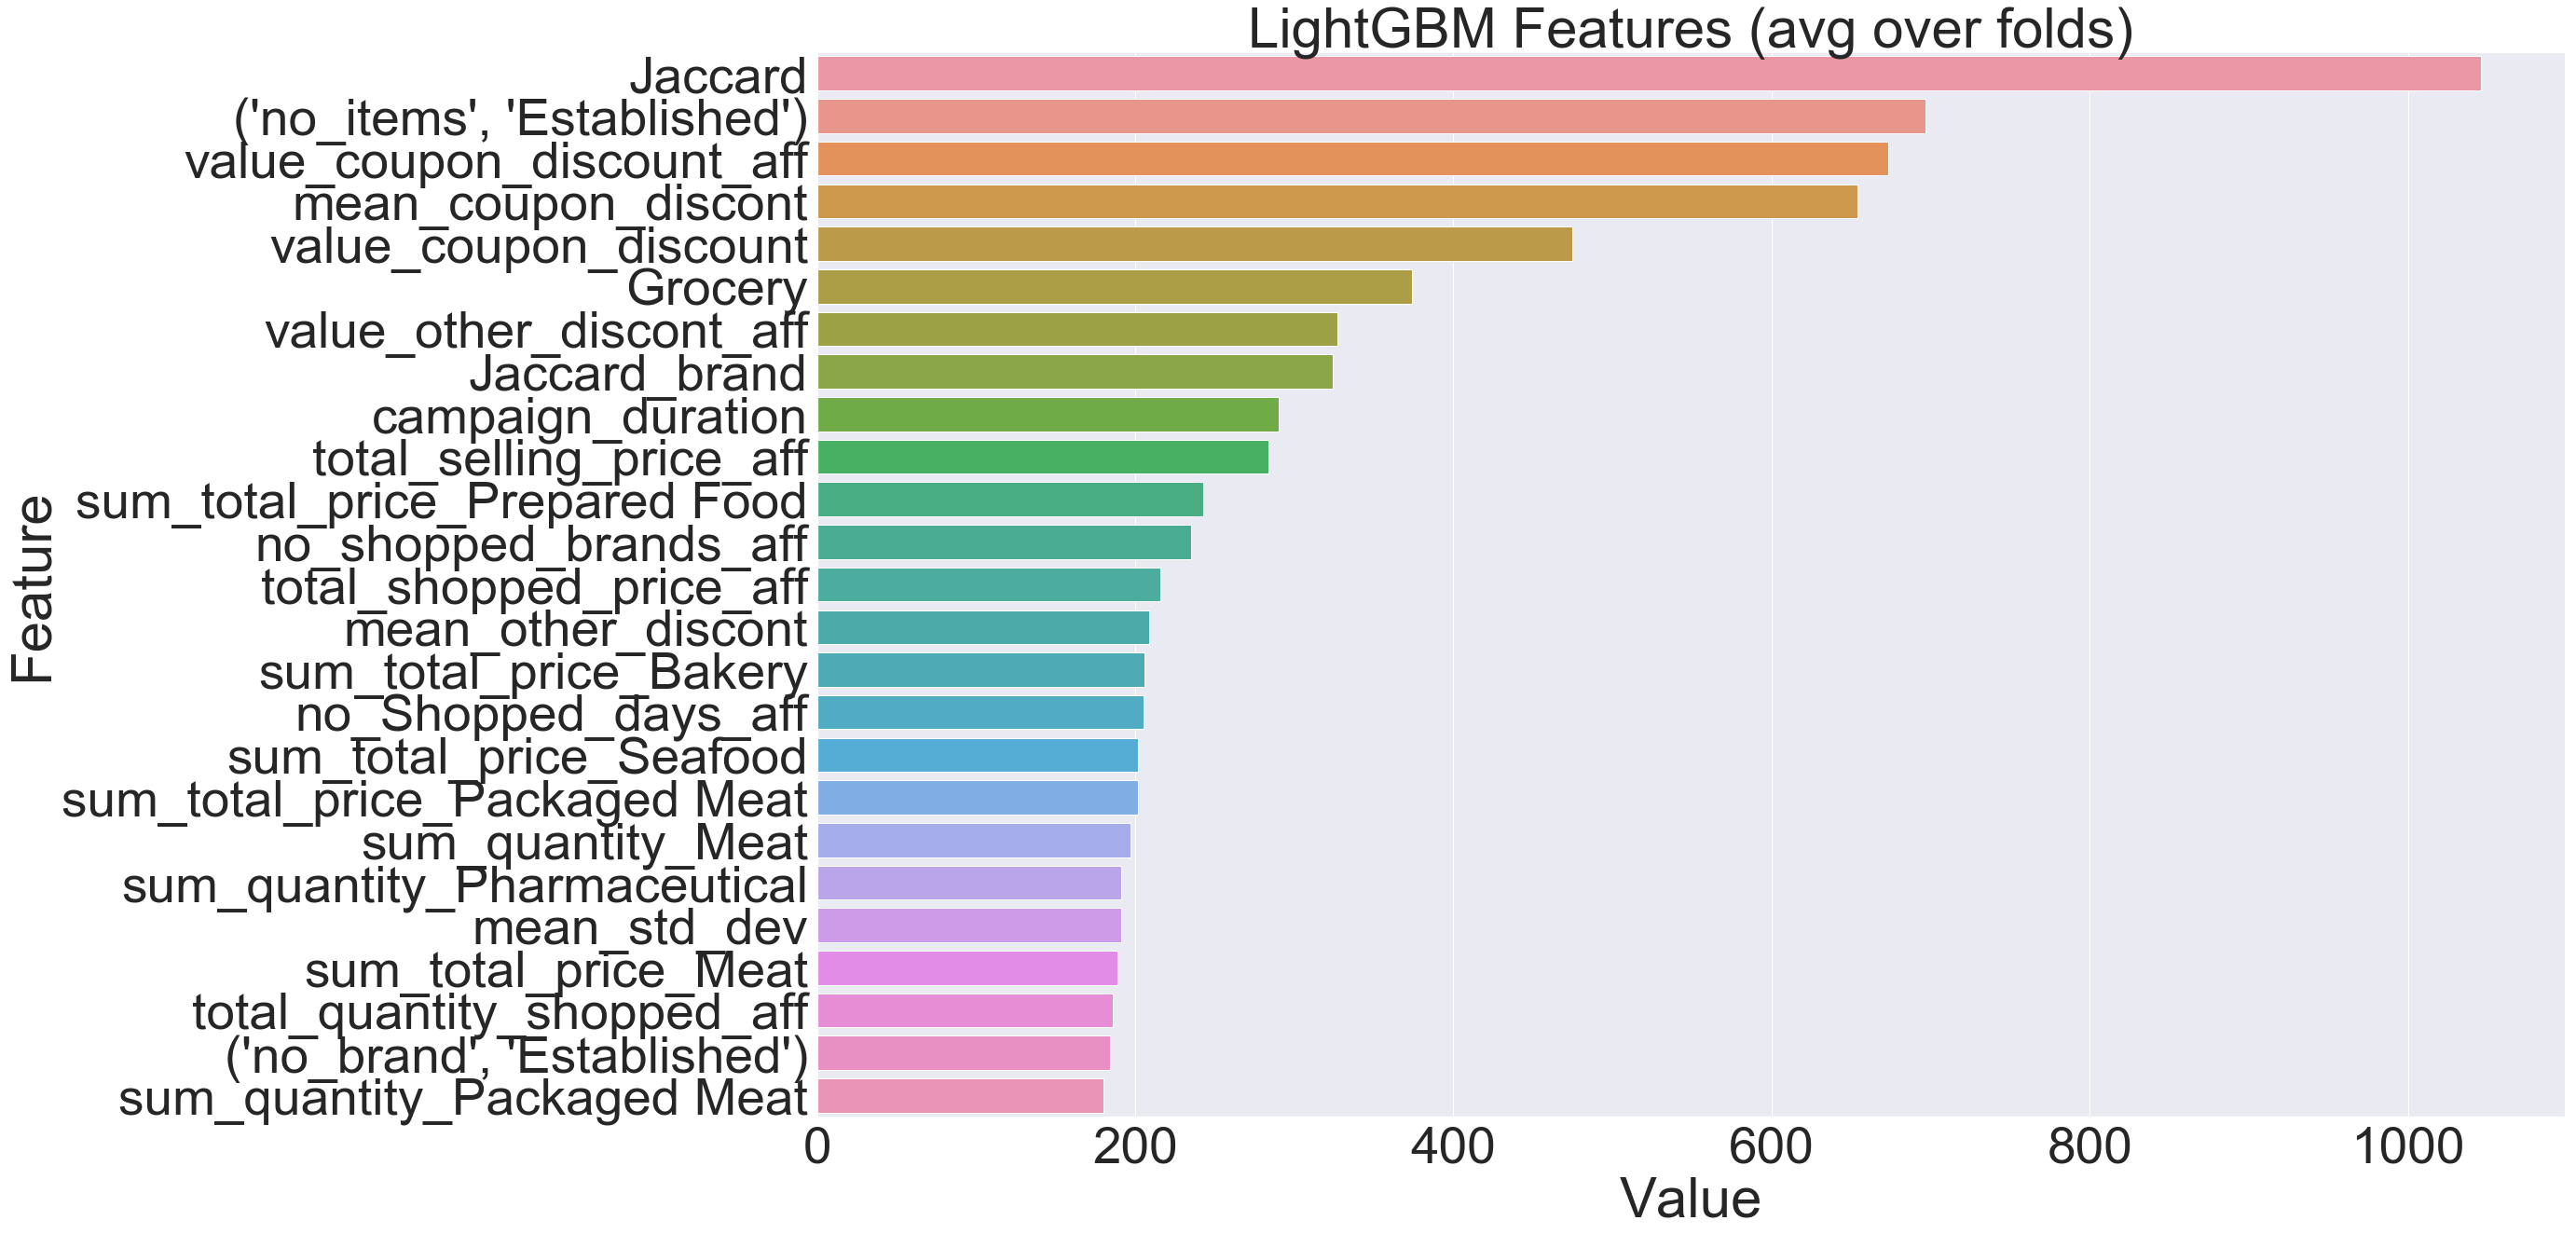

<Figure size 432x288 with 0 Axes>

In [305]:
plotImp(model, X_train, 25)

In [309]:
X_test.isna().sum() == X_test.shape[0]

total_selling_price                            False
total_quantity                                 False
mean_selling_price                             False
mean_std_dev                                   False
max_selling_price                              False
median_selling_price                           False
mean_other_discont                             False
value_other_discount                           False
mean_coupon_discont                            False
value_coupon_discount                          False
sum_quantity_Alcohol                           False
sum_quantity_Bakery                            False
sum_quantity_Dairy, Juices & Snacks            False
sum_quantity_Flowers & Plants                  False
sum_quantity_Fuel                              False
sum_quantity_Garden                            False
sum_quantity_Grocery                           False
sum_quantity_Meat                              False
sum_quantity_Miscellaneous                    

In [308]:
X.isna().sum() == X.shape[0]

total_selling_price                            False
total_quantity                                 False
mean_selling_price                             False
mean_std_dev                                   False
max_selling_price                              False
median_selling_price                           False
mean_other_discont                             False
value_other_discount                           False
mean_coupon_discont                            False
value_coupon_discount                          False
sum_quantity_Alcohol                           False
sum_quantity_Bakery                            False
sum_quantity_Dairy, Juices & Snacks            False
sum_quantity_Flowers & Plants                  False
sum_quantity_Fuel                              False
sum_quantity_Garden                            False
sum_quantity_Grocery                           False
sum_quantity_Meat                              False
sum_quantity_Miscellaneous                    

In [ ]:
X.